<a href="https://colab.research.google.com/github/bobbykawade/NLP-Projects/blob/main/IIML_Wordcloud_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import spacy
import pprint
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
from bs4 import BeautifulSoup
import requests
import re

In [ ]:
url = ['https://www.medicalnewstoday.com/articles/154543#risk-factors']


In [ ]:
def url_to_string(url):
    for url in url:
        res = requests.get(url)
        html = res.text
        soup = BeautifulSoup(html, 'html5lib')
        for script in soup(["script", "style", 'aside']):
            script.extract()
            return " ".join(re.split(r'[\n\t]+', soup.get_text()))
ny_bb = url_to_string(url)
article = nlp(ny_bb)
print(len(ny_bb))

68444


In [ ]:
#install wordcloud
#!conda install -c conda-forge wordcloud==1.4.1 --yes

#import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS


In [ ]:
#! pip install contractions
#! pip install inflect
import re, string, unicodedata
import nltk
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

def preprocess(sample):
    sample = remove_URL(sample)
    sample = replace_contractions(sample)
    # Tokenize
    words = nltk.word_tokenize(sample)

    # Normalize
    return normalize(words)


if __name__ == "__main__":
    sample = ny_bb               
    
    sample = remove_URL(sample)
    sample = replace_contractions(sample)

    # Tokenize
    words = nltk.word_tokenize(sample)
    #print(words)

    # Normalize
    words = normalize(words)
    #print(words)
    
    #stop words
    words = remove_stopwords(words)
    #print(words)
    words = lemmatize_verbs(words)
    #print(words)
    
    words = remove_non_ascii(words)
    #print(words)
    words = to_lowercase(words)
    #print(words)
    
    #removed punctuation
    words = remove_punctuation(words)
    #print(words)
    
    #replace numbers 
    words = replace_numbers(words)
    print(words)
    
    #stem words
    #words = stem_words(words)
    #print(words)

['mental', 'health', 'definition', 'common', 'disorder', 'early', 'sign', 'newsletterwhat', 'mental', 'health', 'medically', 'review', 'timothy', 'j', 'legg', 'phd', 'crnp', 'write', 'adam', 'felman', 'april', 'thirteen', '2020definitionrisk', 'factorscommon', 'disordersearly', 'signstreatmentmental', 'health', 'refer', 'cognitive', 'behavioral', 'emotional', 'wellbeing', 'people', 'think', 'feel', 'behave', 'people', 'sometimes', 'use', 'term', 'mental', 'health', 'mean', 'absence', 'mental', 'disordermental', 'health', 'affect', 'daily', 'live', 'relationships', 'physical', 'health', 'however', 'link', 'also', 'work', 'direction', 'factor', 'people', 'live', 'interpersonal', 'connections', 'physical', 'factor', 'contribute', 'mental', 'health', 'disruptions', 'look', 'mental', 'health', 'preserve', 'person', 'ability', 'enjoy', 'life', 'involve', 'reach', 'balance', 'life', 'activities', 'responsibilities', 'efforts', 'achieve', 'psychological', 'resilienceconditions', 'stress', 'dep

In [ ]:
#Python code to demonstrate 
# how to remove numeric digits from string 
# using join and isdigit 
  
# initialising string 
ini_string = words
  
# printing initial ini_string 
#print("initial string : ", ini_string) 
  
# using join and isdigit  
# to remove numeric digits from string 
res = '  '.join([i for i in ini_string if not i.isdigit()]) 
  
# printing result 
print(len(res))
print( res) 

51202
mental  health  definition  common  disorder  early  sign  newsletterwhat  mental  health  medically  review  timothy  j  legg  phd  crnp  write  adam  felman  april  thirteen  2020definitionrisk  factorscommon  disordersearly  signstreatmentmental  health  refer  cognitive  behavioral  emotional  wellbeing  people  think  feel  behave  people  sometimes  use  term  mental  health  mean  absence  mental  disordermental  health  affect  daily  live  relationships  physical  health  however  link  also  work  direction  factor  people  live  interpersonal  connections  physical  factor  contribute  mental  health  disruptions  look  mental  health  preserve  person  ability  enjoy  life  involve  reach  balance  life  activities  responsibilities  efforts  achieve  psychological  resilienceconditions  stress  depression  anxiety  affect  mental  health  disrupt  person  routine  although  term  mental  health  common  use  many  condition  doctor  recognize  psychological  disorder

In [ ]:
 #Python program to find the k most frequent words 
# from data set 
from collections import Counter 
  
data_set = res
  
# split() returns list of all the words in the string 
split_it = data_set.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(10) 
  
print("Frequent words are \n", most_occur) 


Frequent words are 
 [('mental', 129), ('health', 119), ('tagname', 94), ('source', 93), ('title', 81), ('p', 78), ('disorder', 73), ('and', 58), ('url', 57), ('link', 48)]


In [ ]:
stopwords = set(STOPWORDS) 
stopwords = ["title", "tagname", "url","css29oowu","slug","hereu003cau003e","id","gad","u003cstrongu003e","five","cmd","ul","legg","phd","three","four","noreferrer","seven","eight","timothy","crnp","h3","_blank","rel","type","noopener","noopener,_blank ","u003ca","contentlink","thousand","hundred","href","source","link","one","two","class","people"] + list(STOPWORDS)

#stopwords.add('title','tagname')
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(data_set) 

In [ ]:
wordcloud

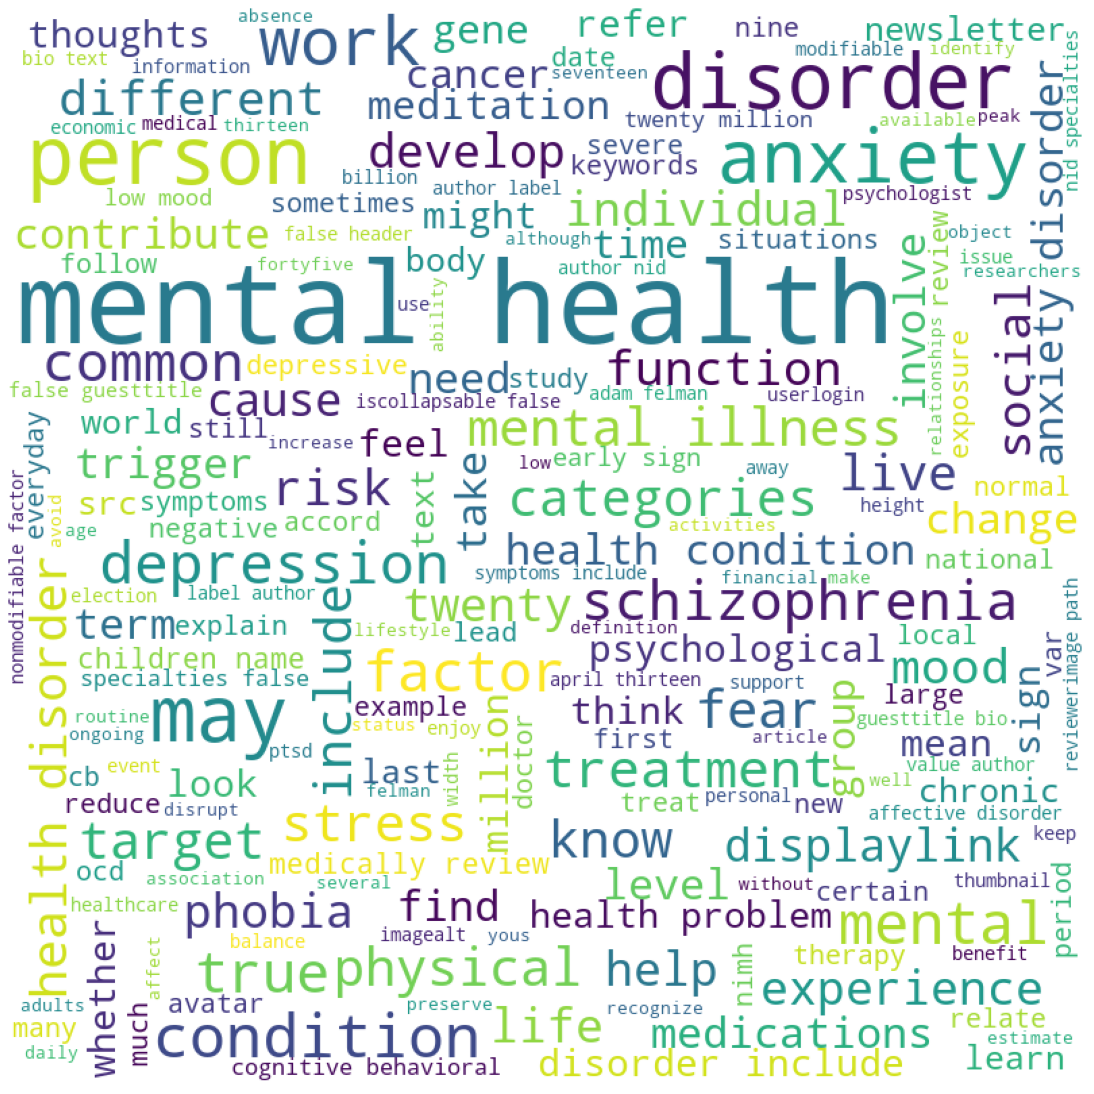

In [ ]:

import matplotlib.pyplot as plt 

# plot the WordCloud image                        
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
from textblob import TextBlob

In [ ]:
import pandas as pd
WordList = TextBlob(data_set).ngrams(3)
WordList
type(WordList)
df = pd.DataFrame(WordList, columns=['ng1','ng2','ng3'])
print (df)

             ng1         ng2         ng3
0         mental      health  definition
1         health  definition      common
2     definition      common    disorder
3         common    disorder       early
4       disorder       early        sign
...          ...         ...         ...
5366  reviewedby     timothy           j
5367     timothy           j        legg
5368           j        legg         phd
5369        legg         phd        crnp
5370         phd        crnp       image

[5371 rows x 3 columns]
